In [1]:
import seesaw

In [2]:
import os
import importlib
import numpy as np
from tqdm.auto import tqdm

In [3]:
import ray

In [4]:
import seesaw.seesaw_bench
import seesaw.figures

importlib.reload(seesaw.seesaw_bench)
importlib.reload(seesaw.figures)

from seesaw.seesaw_bench import *
from seesaw.figures import *

In [5]:
ray.init('auto', namespace='seesaw')

2022-01-25 12:38:46,448	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 172.31.130.200:6379
2022-01-25 12:38:46,576	WARNING worker.py:1219 -- The autoscaler failed with the following error:
Terminated with signal 15
  File "/home/gridsan/omoll/.local/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 543, in <module>
    monitor.run()
  File "/home/gridsan/omoll/.local/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 439, in run
    self._run()
  File "/home/gridsan/omoll/.local/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 346, in _run
    time.sleep(AUTOSCALER_UPDATE_INTERVAL_S)



{'node_ip_address': '172.31.130.200',
 'raylet_ip_address': '172.31.130.200',
 'redis_address': '172.31.130.200:6379',
 'object_store_address': '/state/partition1/user/omoll/raytmp/session_2022-01-25_12-37-17_759625_39485/sockets/plasma_store',
 'raylet_socket_name': '/state/partition1/user/omoll/raytmp/session_2022-01-25_12-37-17_759625_39485/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/state/partition1/user/omoll/raytmp/session_2022-01-25_12-37-17_759625_39485',
 'metrics_export_port': 39144,
 'node_id': '12b317727916d143be3aa1e362af19a2623a2ac3039a0bd5a3cc0c7d'}

In [6]:
import importlib

In [7]:
results_path ='/home/gridsan/omoll/bench_results/bench_MftTjbVRgA/'
stats = get_metrics_table(results_path, at_N=30)

Map Progress: 100%|██████████| 200/200 [00:01<00:00, 191.92it/s]
/home/gridsan/omoll/seesaw/seesaw/figures.py:163: RuntimeWarning: invalid value encountered in floor_divide


In [8]:
stats.to_parquet('/home/gridsan/omoll/bench_results/bench_MftTjbVRgA/computed_metrics.parquet')

In [17]:
total_seen = 10
total_pos = 15
hit_indices= np.array([1,4,10])

all_hit_indices = np.ones(total_pos)*np.inf
all_hit_indices[:hit_indices.shape[0]] = hit_indices

nseen = all_hit_indices + 1
nfound = np.arange(all_hit_indices.shape[0]) + 1

In [3]:
import numpy as np

In [11]:
precision_at = nfound/nseen

In [13]:
average_precision = precision_at.mean()

In [18]:
best_seen = nfound.copy()
best_seen[total_seen:] = 0

In [22]:
best_seen[total_seen:] = 1.

In [10]:
stats = stats.assign(dataset=stats.d_name,
                     index_name=stats.i_name,
                        category=stats.ground_truth_category,
                     variant=stats.name)

In [18]:
#stats[stats.nfirst.isna()]

In [15]:
stats = stats.assign(variant=stats.variant.map(lambda x : {'baseline':'plain', 'multi':'multiplain'}.get(x,x)))

by dataset


,multiplain,plain,seesaw,num_queries
dataset,,,,
data/bdd/,0.732531,0.752610,0.780483,29
data/coco/,0.935725,0.900071,0.966606,80
data/dota/,0.820359,0.710243,0.920341,15
data/lvis/,0.716938,0.616340,0.763221,1203
data/objectnet/,0.532944,0.532589,0.576764,313


by query


,better,same,worse,total
dataset,,,,
data/bdd/,7,17,5,29
data/coco/,19,60,1,80
data/dota/,8,7,0,15
data/lvis/,707,457,39,1203
data/objectnet/,128,180,5,313
total,869,721,50,1640


\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset         &         &       &        &        \\
\midrule
data/bdd/       &       7 &    17 &      5 &     29 \\
data/coco/      &      19 &    60 &      1 &     80 \\
data/dota/      &       8 &     7 &      0 &     15 \\
data/lvis/      &     707 &   457 &     39 &   1203 \\
data/objectnet/ &     128 &   180 &      5 &    313 \\
total           &     869 &   721 &     50 &   1640 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1640.0


part,.1,.3,1.
variant,,,
counts,133,218,1289
baseline,.03,.22,.78
this work,.13,.50,.86
ratio,4.48,2.29,1.1


\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &  133 &  218 & 1289 \\
baseline  &  .03 &  .22 &  .78 \\
this work &  .13 &  .50 &  .86 \\
ratio     & 4.48 & 2.29 &  1.1 \\
\bottomrule
\end{tabular}

ablation


part,.1,.1 delta,.3,.3 delta,1.,1. delta
variant,,,,,,
semantic embeddding,.03,NaN,.22,NaN,.78,NaN
+ multiscale search,.10,.07,.41,.19,.81,.03
+ feedback fusion,.13,.03,.50,.09,.86,.05


\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .03 &       NaN & .22 &       NaN & .78 &       NaN \\
+ multiscale search & .10 &       .07 & .41 &       .19 & .81 &       .03 \\
+ feedback fusion   & .13 &       .03 & .50 &       .09 & .86 &       .05 \\
\bottomrule
\end{tabular}



part,.1,.1 delta,.3,.3 delta,1.,1. delta
variant,,,,,,
semantic embeddding,0.028201,NaN,0.219742,NaN,0.783165,NaN
+ multiscale search,0.096716,0.068515,0.413792,0.194049,0.811485,0.02832
+ feedback fusion,0.126368,0.029652,0.502531,0.088739,0.860765,0.04928


/state/partition1/llgrid/pkg/anaconda/anaconda3-2021b/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


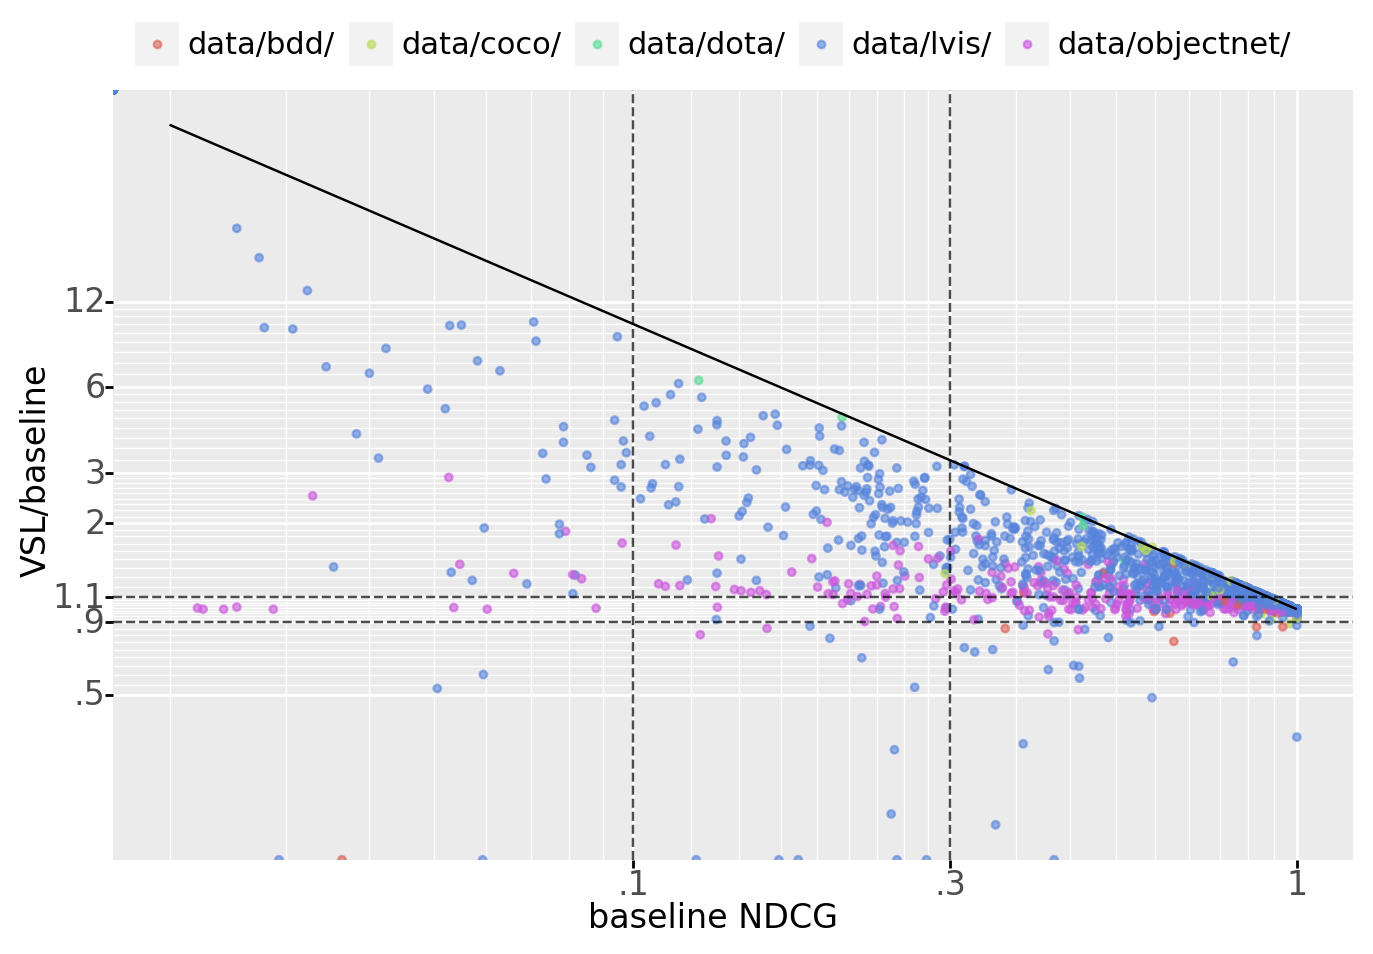

<ggplot: (8770095923601)>

In [16]:
print_tables(stats,variant='seesaw')

In [ ]:
sbs = side_by_side_comparison(stats, 'plain', metric='ndcg_score')

In [ ]:
sbs2 = sbs[(sbs.variant == variant)][['dataset', 'category', 'ndcg_score', 'base_ndcg_score', 'nfirst_x', 'nfirst_y', 'nfound_x', 'nfound_y']]

In [ ]:
sbs2[(sbs2.ndcg_score > 0) & (sbs2.base_ndcg_score == 0)].shape

In [ ]:
sbs2[(sbs2.ndcg_score == 0) & (sbs2.base_ndcg_score > 0)]

In [ ]:
variant='multiplain_warm_vec_only'
print_tables(stats,variant=variant)

In [ ]:
stats100_objnet_lrsmall,_ = process_tups(results_on1, at_N=100)

In [ ]:
print_tables(stats100_objnet_lrsmall, variant='multiplain_warm_vec_fast')

In [ ]:
stats100_feedback10,_ = process_tups(new_results, at_N=100)

In [ ]:
print_tables(stats100_feedback10, variant='multiplain_warm_vec_fast')

In [ ]:
#stats100_feedback10

In [ ]:
print_tables(stats30, variant='multiplain_warm_vec_fast')

In [ ]:
print_tables(stats, variant='multiplain_warm_vec_fast')

In [ ]:
print_tables(stats, variant='multiplain_warm_vec_fast')

In [ ]:
print_tables(evs2, variant='multiplain_warm_vec_fast_new', resultlist=results, at_N=100)

In [ ]:
Out[101]

In [ ]:
print_tables(evs2, variant='multiplain_warm_vec_fast', resultlist=results, at_N=100)

In [ ]:
print_tables(evs2, variant='multiplain_warm_vec_fast', resultlist=results, at_N=30)

In [ ]:
stats = process_tups(evs=evs2, keys=evs.keys(), benchresults=benchresults, at_N=100)
all_vars = stats.groupby(['dataset', 'category', 'variant',]).ndcg_score.mean().unstack(-1)
means = all_vars.groupby('dataset').mean()
counts = all_vars.groupby('dataset').size()
pd.concat([means, counts],axis=1)

In [ ]:
stats = process_tups(evs=evs2, keys=evs.keys(), benchresults=benchresults, at_N=100)
all_vars = stats.groupby(['dataset', 'category', 'variant',]).ndcg_score.mean().unstack(-1)
means = all_vars.groupby('dataset').mean()
counts = all_vars.groupby('dataset').size()
pd.concat([means, counts],axis=1)

In [ ]:
stats = process_tups(evs=evs2, keys=evs.keys(), benchresults=benchresults, at_N=100)
all_vars = stats.groupby(['dataset', 'category', 'variant',]).ndcg_score.mean().unstack(-1)
means = all_vars.groupby('dataset').mean()
counts = all_vars.groupby('dataset').size()
pd.concat([means, counts],axis=1)

In [ ]:
bsw_table(stats, reltol=1.1)

In [ ]:
bsw_table(stats, reltol=1.1)

In [ ]:
bsw_table(stats, reltol=1.1)

In [ ]:
bsw = bsw_table(stats)

In [ ]:
from seesaw 

In [ ]:
sbs = better_same_worse(stats, variant='multiplain_warm_vec_only', summary=False)

In [ ]:
tot_res = summary_breakdown(sbs)
#.groupby(['dataset', 'variant']).category.apply(lambda x : x.unique().shape[0]).unstack(level=-1)

In [ ]:
comparison_table(tot_res)

In [ ]:
ablation_table(tot_res)

In [ ]:
ablation_table(tot_res)

In [ ]:
plotdata = sbs[sbs.variant == 'multiplain_warm_vec_only']

In [ ]:
make_labeler.__module__

In [ ]:
ablation_table(tot_res)

x = np.geomspace(.02, 1, num=5)
y = 1/x
diag_df = pd.DataFrame({'x':x, 'y':y})

scatterplot = (ggplot(plotdata)
    + geom_point(aes(x='base', y='ratio', fill='dataset', color='dataset'), alpha=.6, size=1.) 
#                 shape=plotdata.dataset.map(lambda x : '.' if x in ['lvis','objectnet'] else 'o'), 
#                 size=plotdata.dataset.map(lambda x : 1. if x in ['lvis','objectnet'] else 2.))
#  + geom_text(aes(x='base', y='delta', label='category', color='dataset'), va='bottom', 
#              data=plotdata1[plotdata1.ratio < .6], 
#              position=position_jitter(.05, .05), show_legend=False)
    + geom_line(aes(x='x', y='y'), data=diag_df)
 + ylab('VSL/baseline')
#               + geom_area(aes(y2=1.1, y=.9), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=1.1), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=.9), linetype='dashed', alpha=.7)


                + geom_vline(aes(xintercept=.1,), linetype='dashed', alpha=.7)
                + geom_vline(aes(xintercept=.3,), linetype='dashed', alpha=.7)
#+ geom_abline()
#    + geom_point(aes(x='recall', y='precision', color='variant'), size=1.)
#     + facet_wrap(facets=['cat'], ncol=6, scales='free_x')
 + xlab('baseline NDCG')
# +scale_color_discrete()
    + theme(figure_size=(8,5), legend_position='top',
           subplots_adjust={'hspace': 0.5}, legend_title=element_blank(),
            legend_box_margin=-1, legend_margin=0.,
            axis_text=element_text(size=12, margin={'t':.2, 'l':-.3}),
            legend_text=element_text(size=11),
            axis_title=element_text(size=12, margin={'r':-.2, 'b':0., 'l':0, 't':0.}),
           )
    + scale_x_log10(labels=make_labeler(brief_format), breaks=[.01, .1, .3, 1.])
    + scale_y_log10(labels=make_labeler(brief_format), breaks=[.5, 0.9, 1.1, 2., 3.,6, 12])
)

scatterplot

In [ ]:
scatterplot.save('/home/gridsan/omoll/seesaw.scatterfull.png')

In [ ]:
x = np.geomspace(.02, 1, num=5)
y = 1/x
diag_df = pd.DataFrame({'x':x, 'y':y})

scatterplot = (ggplot(plotdata)
    + geom_point(aes(x='base', y='ratio', fill='dataset', color='dataset'), alpha=.6, size=1.) 
#                 shape=plotdata.dataset.map(lambda x : '.' if x in ['lvis','objectnet'] else 'o'), 
#                 size=plotdata.dataset.map(lambda x : 1. if x in ['lvis','objectnet'] else 2.))
#  + geom_text(aes(x='base', y='delta', label='category', color='dataset'), va='bottom', 
#              data=plotdata1[plotdata1.ratio < .6], 
#              position=position_jitter(.05, .05), show_legend=False)
    + geom_line(aes(x='x', y='y'), data=diag_df)
 + ylab('VSL/baseline')
#               + geom_area(aes(y2=1.1, y=.9), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=1.1), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=.9), linetype='dashed', alpha=.7)


                + geom_vline(aes(xintercept=.1,), linetype='dashed', alpha=.7)
                + geom_vline(aes(xintercept=.3,), linetype='dashed', alpha=.7)
#+ geom_abline()
#    + geom_point(aes(x='recall', y='precision', color='variant'), size=1.)
#     + facet_wrap(facets=['cat'], ncol=6, scales='free_x')
 + xlab('baseline NDCG')
# +scale_color_discrete()
    + theme(figure_size=(8,5), legend_position='top',
           subplots_adjust={'hspace': 0.5}, legend_title=element_blank(),
            legend_box_margin=-1, legend_margin=0.,
            axis_text=element_text(size=12, margin={'t':.2, 'l':-.3}),
            legend_text=element_text(size=11),
            axis_title=element_text(size=12, margin={'r':-.2, 'b':0., 'l':0, 't':0.}),
           )
    + scale_x_log10(labels=make_labeler(brief_format), breaks=[.01, .1, .3, 1.])
    + scale_y_log10(labels=make_labeler(brief_format), breaks=[.5, 0.9, 1.1, 2., 3.,6, 12])
)

scatterplot

In [ ]:
cats = plotdata[plotdata.dataset == 'lvis'].sort_values('nfirst_y', ascending=False)[['category', 'nfirst_x', 'nfirst_y']].reset_index(drop=True)

In [ ]:
cats.to_parquet('./data/cats_lvis_ordered.parquet')

In [ ]:
sbs[(sbs.nfirst_x <= 5) & (sbs.nfirst_y > 20) & (sbs.variant == 'multiplain_warm_vec_only')]

In [ ]:
# hot air balloon